# Majorization Project

- Sortear vetores uniformes (várias dimensões)
- normalizar (sum == 1)
- histograma

In [1]:
import torch
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# normalize
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

> Different Test

In [109]:
vec_list = list()
vector_size = 4
for i in range(100000):
    vec = np.random.uniform(size=vector_size-1) #sorting
    vec = np.append(vec,[0])
    vec = np.append(vec,[1])
    sorted_vec = np.sort(vec)
    prob_vec = list()
    for j in range(vector_size):
        prob_vec.append(sorted_vec[j+1] - sorted_vec[j])
    # print(prob_vec)
    # print(np.sum(prob_vec))
    vec_list.append(prob_vec)

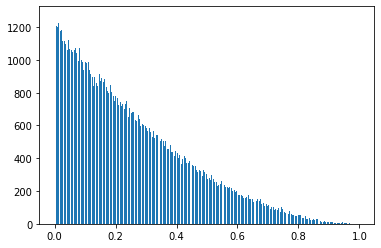

In [110]:
hist,bins = np.histogram(vec_list,np.arange(0,1,0.001))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

> Scipy tests

In [2]:
from scipy.stats import uniform

In [82]:
sc_vec = uniform.rvs(size=3)
print(sc_vec)
# sc_vec /= np.sum(sc_vec)
sc_vec = softmax(sc_vec)
print(sc_vec)
print(np.sum(sc_vec))

[0.73220627 0.4795352  0.99319423]
[0.32521009 0.25259826 0.42219165]
1.0


In [113]:
sc_vec_list = list()
for i in range(100000):
    sc_vec = uniform.rvs(size=4) #sorting
    # sc_vec /= np.sum(sc_vec) #normalizing
    sc_vec = softmax(sc_vec) #normalizing
    sc_vec_list.append(sc_vec)

In [18]:
print(np.sum(sc_vec_list[5]))

0.9999999999999998


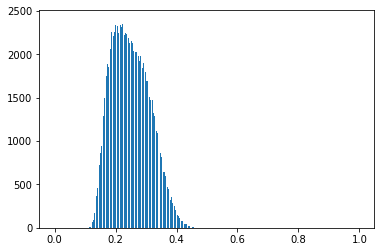

In [114]:
hist,bins = np.histogram(sc_vec_list,np.arange(0,1,0.001))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

> Pytorch tests

In [49]:
ten = torch.rand(3)
# ten /= ten.sum().expand_as(ten)
ten = softmax(ten.numpy())
print(ten)
print(ten.sum())

[0.36708328 0.37183535 0.2610814 ]
1.0


In [50]:
ten_list = list()
for i in range(1000):
    ten = torch.rand(3) #sorting
    # ten /= ten.sum().expand_as(ten) #normalizing
    ten = softmax(ten.numpy()) # normalizing
    # ten_list.append(ten.numpy())
    ten_list.append(ten)

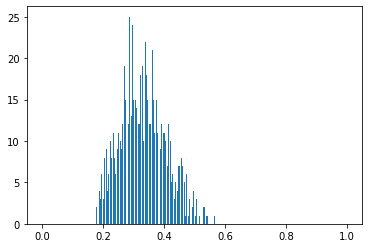

In [51]:
hist,bins = np.histogram(ten_list,np.arange(0,1,0.001))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [13]:
ten_list[5].sum()

0.99999994

> Numpy tests

In [77]:
vec = np.random.uniform(size=3)
print(vec)
vec2 = vec
vec2 /= vec2.sum(0)
print(vec2)
print(vec2.sum())
vec_sum = vec.sum()
vec3 = [v/vec_sum for v in vec]
print(vec3)
print(np.sum(vec3))

print(vec.sum())

[0.80949649 0.85227675 0.25369293]
[0.42261069 0.44494482 0.13244448]
0.9999999999999999
[0.42261069485108754, 0.4449448219076576, 0.13244448324125496]
1.0000000000000002
0.9999999999999999


In [58]:
x = vec
print(x.sum())

1.0


In [32]:
y = vec
print(y.sum())

0.9999999999999999


In [33]:
x.sum() == y.sum()

False

In [102]:
np.isclose(0.99999,1.00)

True

In [143]:
vec_list = list()
for i in range(100000):
    vec = np.random.uniform(size=4) #sorting
    # vec /= vec.sum() #normalizing
    vec = softmax(vec)
    vec_list.append(vec)

In [98]:
print(vec_list)
[np.sort(vec)[::-1] for vec in vec_list]

[array([0.4097827, 0.262798 , 0.3274193]), array([0.30633958, 0.41283228, 0.28082814]), array([0.25247298, 0.47971917, 0.26780784]), array([0.27120033, 0.37560094, 0.35319873]), array([0.30020294, 0.25798495, 0.44181212]), array([0.36444407, 0.19507115, 0.44048478]), array([0.43570486, 0.389657  , 0.17463814]), array([0.31333805, 0.42098783, 0.26567412]), array([0.2920356 , 0.45754642, 0.25041799]), array([0.35558218, 0.33490509, 0.30951273])]


[array([0.4097827, 0.3274193, 0.262798 ]),
 array([0.41283228, 0.30633958, 0.28082814]),
 array([0.47971917, 0.26780784, 0.25247298]),
 array([0.37560094, 0.35319873, 0.27120033]),
 array([0.44181212, 0.30020294, 0.25798495]),
 array([0.44048478, 0.36444407, 0.19507115]),
 array([0.43570486, 0.389657  , 0.17463814]),
 array([0.42098783, 0.31333805, 0.26567412]),
 array([0.45754642, 0.2920356 , 0.25041799]),
 array([0.35558218, 0.33490509, 0.30951273])]

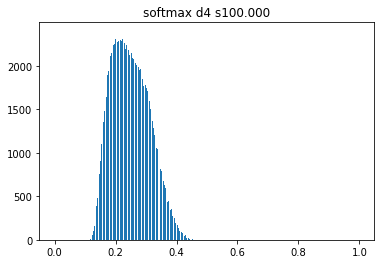

In [144]:
hist,bins = np.histogram(vec_list,np.arange(0,1,0.001))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('softmax d4 s100.000')
plt.show()